In [7]:
all_task = [ 'icd infection', 'icd neoplasms', 'icd endocrine', 'icd blood', 'icd mental', 'icd nervous',
         'icd circulatory', 'icd respiratory', 'icd digestive', 'icd genitourinary', 'icd pregnancy',
         'icd skin', 'icd musculoskeletal', 'icd congenital', 'icd ill-defined','icd injury', 'dis 24h', 'dis 48h', 'mor 24h', 'mor 48h',
         'LOS', 'REA', 'ACU',  'dnr 24h', 'dnr 48h', 'cmo 24h', 'cmo 48h']
import torch
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# tsne_plot_2d('Anna Karenina by Leo Tolstoy', embeddings_ak_2d, a=0.1)
import torch
import numpy as np
from sklearn.manifold import TSNE
import copy
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
# all_comb = train_visual
perf = pd.read_csv('./gain_data/3000addpair/27tasks_validy_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]

In [4]:
perf = pd.read_csv('./gain_data/3000addpair/27tasks_validy_clean.csv',sep=' ',header=None).values
mask = pd.read_csv('./gain_data/3000addpair/27tasks_validx_clean.csv',sep=' ',header=None).values
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
perf=perf[new_index]

(-32.83335694509556, 41.658270506580294)
(-28.73464616050934, 27.421557969389678)


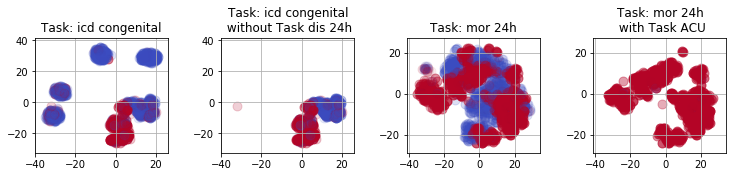

In [16]:
all_comb = np.concatenate((train_visual,test_visual),axis=0)
a = 0.7
# 18 22
plt.figure(figsize=(12, 2))
for select_task_idx in [13]:
    selected_comb = all_comb[np.where(all_comb[:,select_task_idx,:].sum(1)!=0)]
    X = selected_comb[:,select_task_idx,:]
    X_embedded = TSNE(n_components=2,perplexity=75, random_state=3).fit_transform(X)
    _perf = copy.deepcopy(perf)
    sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
    _perf = _perf[sel_idx]
    _a = copy.deepcopy(_perf[:,select_task_idx])
    _perf = _perf[:,select_task_idx]
    perf_max,perf_min = np.max(_perf), np.min(_perf)
    for i in range(len(_perf)):
        if(_perf[i]>0):
            _perf[i] = 1
            _a[i] = _a[i]/(perf_max+0.00001)
        else:
            _perf[i] = -0.5
            _a[i] = _a[i]/(perf_min-0.00001) + 0.1
        if(_a[i]>0.99):
            _a[i] = 1
    label = list(range(len(X)))
    color = _perf
    embeddings = X_embedded
    title = 'Task: ' + all_task[select_task_idx]
    plt.subplot(1,4,1)
    plt.title(title)
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    colors = cm.rainbow(np.linspace(0, 1, len(y)))
    c = color
    # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
    plt.grid(True)
    print(plt.gca().get_ylim())
    x_axis, y_axis = plt.gca().get_xlim(), plt.gca().get_ylim()
    # task_embedd_c, x_axis, y_axis =tsne_plot_2d(keys,X_embedded,color = _perf,title='Task Representation, Medical Task '+str(select_task_idx),show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)
    for j in [16]:
        if(j == select_task_idx):
            continue
        plt.subplot(1,4,2)
        # figure_idx = figure_idx + 1
        X_embedded_withi = X_embedded[np.where(selected_comb[:,j,:].sum(1)==0)]
        keys = list(range(len(X_embedded_withi)))
        label = keys
        anchor_xy = [1.05, 0.9]
        show_legend=True
        save_fig=False
        a = 1
        col = 1
        x = X_embedded_withi[:,0]
        y = X_embedded_withi[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        colors = cm.rainbow(np.linspace(0, 1, len(y)))
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        # X_embedded_withi = X_embedded[np.where(selected_comb[:,j,:].sum(1)!=0)]
        _perf = _perf[sel_idx]
        sel_idx = np.where(selected_comb[:,j,:].sum(1)==0)[0]
        _perf = _perf[sel_idx]
        X = selected_comb[:,select_task_idx,:]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(_perf[i]), label=label[i],s=80)
        plt.gca().set_ylim(y_axis)
        plt.gca().set_xlim(x_axis)
        # if(show_legend==True):
        #     plt.legend(bbox_to_anchor=(anchor_xy[0], anchor_xy[1]),ncol=col)
        plt.grid(True)
        plt.title('Task: ' + all_task[select_task_idx]+'\n without Task '+all_task[j])
for select_task_idx in [18]:
    selected_comb = all_comb[np.where(all_comb[:,select_task_idx,:].sum(1)!=0)]
    X = selected_comb[:,select_task_idx,:]
    X_embedded = TSNE(n_components=2,perplexity=75, random_state=3).fit_transform(X)
    _perf = copy.deepcopy(perf)
    sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
    _perf = _perf[sel_idx]
    _a = copy.deepcopy(_perf[:,select_task_idx])
    _perf = _perf[:,select_task_idx]
    perf_max,perf_min = np.max(_perf), np.min(_perf)
    for i in range(len(_perf)):
        if(_perf[i]>0):
            _perf[i] = 1
            _a[i] = _a[i]/(perf_max+0.00001)
        else:
            _perf[i] = -0.5
            _a[i] = _a[i]/(perf_min-0.00001) + 0.1
        if(_a[i]>0.99):
            _a[i] = 1
    label = list(range(len(X)))
    color = _perf
    embeddings = X_embedded
    title = 'Task: ' + all_task[select_task_idx]
    plt.subplot(1,4,3)
    plt.title(title)
    x = embeddings[:,0]
    y = embeddings[:,1]
    cmap = matplotlib.cm.get_cmap('coolwarm')
    colors = cm.rainbow(np.linspace(0, 1, len(y)))
    c = color
    # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
    plt.grid(True)
    print(plt.gca().get_ylim())
    x_axis, y_axis = plt.gca().get_xlim(), plt.gca().get_ylim()
    # task_embedd_c, x_axis, y_axis =tsne_plot_2d(keys,X_embedded,color = _perf,title='Task Representation, Medical Task '+str(select_task_idx),show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)
    for j in [22]:
        if(j == select_task_idx):
            continue
        plt.subplot(1,4,4)
        # figure_idx = figure_idx + 1
        X_embedded_withi = X_embedded[np.where(selected_comb[:,j,:].sum(1)!=0)]
        keys = list(range(len(X_embedded_withi)))
        label = keys
        anchor_xy = [1.05, 0.9]
        show_legend=True
        save_fig=False
        a = 1
        col = 1
        x = X_embedded_withi[:,0]
        y = X_embedded_withi[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        colors = cm.rainbow(np.linspace(0, 1, len(y)))
        _perf = copy.deepcopy(perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        # X_embedded_withi = X_embedded[np.where(selected_comb[:,j,:].sum(1)!=0)]
        _perf = _perf[sel_idx]
        sel_idx = np.where(selected_comb[:,j,:].sum(1)!=0)[0]
        _perf = _perf[sel_idx]
        X = selected_comb[:,select_task_idx,:]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _perf = _perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        for i in range(len(x)):
            plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(_perf[i]), label=label[i],s=80)
        plt.gca().set_ylim(y_axis)
        plt.gca().set_xlim(x_axis)
        # if(show_legend==True):
        #     plt.legend(bbox_to_anchor=(anchor_xy[0], anchor_xy[1]),ncol=col)
        plt.grid(True)
        plt.title('Task: ' + all_task[select_task_idx]+'\n with Task '+all_task[j])
        # if(save_fig ==True):
    plt.savefig('./embed_visual/remove_add.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    plt.show()

In [13]:
import pickle
dataset = '27tasksaddpair'
embedding_list = np.load('./embedding_collect/'+ dataset +'_encoder_output_list_sd.npy',allow_pickle=True)
train_visual = embedding_list[-1]
test_visual = embedding_list[-2]
all_comb = np.concatenate((train_visual,test_visual),axis=0)
with open('./log/27tasksaddpair/pred_pertask_trajactiveper.pkl', "rb") as fp:   
    pred_traj = pickle.load(fp)
with open('./27tasksaddpair/mask_pertask_trajactiveper.pkl', "rb") as fp:   
    mask_traj = pickle.load(fp)
pred_perf = pred_traj[-1]
mask = mask_traj[-1]
visual_mask = np.zeros(all_comb.sum(2).shape)
visual_mask[all_comb.sum(2)!=0]=1
new_index =[]
for i in visual_mask:
    for j in range(len(mask)):
        if((i == mask[j]).all()):
            new_index.append(j)
            continue
pred_perf=pred_perf[new_index]

27
(-15.135441504283886, 16.619686727594807)
108
(-14.852654201756952, 16.591327138844566)
189
(-14.558996437145971, 16.565281392076997)
270
(-14.467916137273814, 16.527168360969117)
351
(-13.243940509281583, 16.42070584895568)


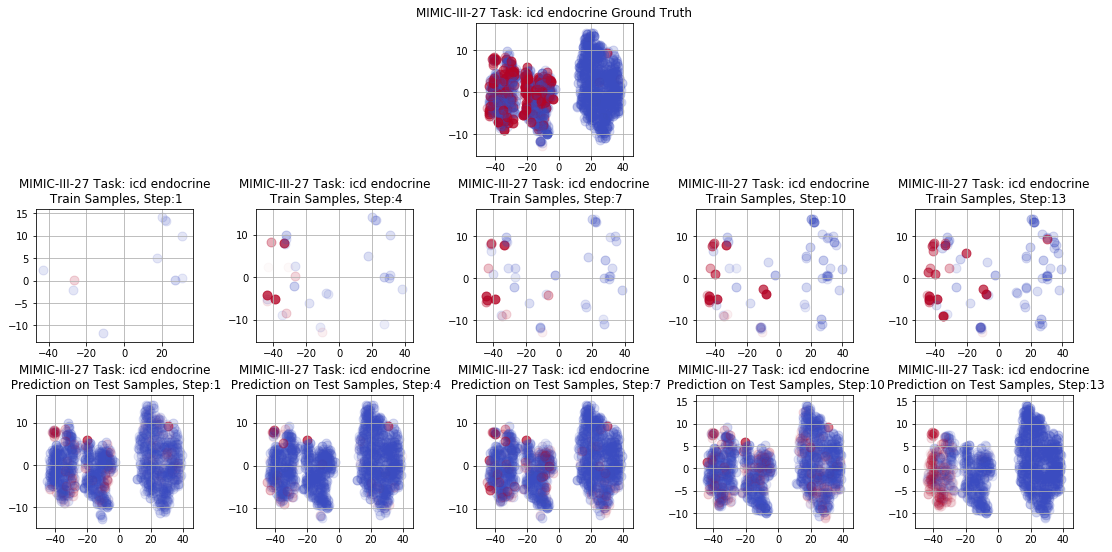

In [20]:
import copy
# 203
_perf = copy.deepcopy(perf)
plt.figure(figsize=(18,12))
figure_idx = 1
# 13可以用
with_task_idx = 10
for select_task_idx in [2]:
    for step in range(5):
        step_title = str(step*3+1)
        pred_perf = pred_traj[27*(step*3+1)]
        print(27*(step*3+1))
        mask = mask_traj[27*(step*3+1)]
        visual_mask = np.zeros(all_comb.sum(2).shape)
        visual_mask[all_comb.sum(2)!=0]=1
        new_index =[]
        for i in visual_mask:
            for j in range(len(mask)):
                if((i == mask[j]).all()):
                    new_index.append(j)
                    continue
        pred_perf=pred_perf[new_index]
        tmp = 75
        a = 0.7
        _perf = copy.deepcopy(perf)
        _pred_perf = copy.deepcopy(pred_perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        trainset_idx = []
        testset_idx = []
        for i in range(len(sel_idx)):
            if(sel_idx[i]<len(train_visual)- 13*27 + (step)*27*3 + 27 ):
                trainset_idx.append(i)
            else:
                testset_idx.append(i)
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _pred_perf = _pred_perf[sel_idx]
        _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        _pred_perf = _pred_perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        for i in range(len(_pred_perf)):
            if(_pred_perf[i]>0):
                _pred_perf[i] = 1
                _a_pred[i] = _a_pred[i]/(perf_max+0.00001)
            else:
                _pred_perf[i] = -0.5
                _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
            if(_a_pred[i]>0.99):
                _a_pred[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        embeddings = X_embedded
        label = keys
        color=_perf
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        if(step == 0):
            plt.subplot(4,5,3)
            title =  'MIMIC-III-27 Task: ' + all_task[select_task_idx] +' Ground Truth'
            plt.title(title)
            plt.grid(True)
            for i in range(len(x)):
                plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
        print(plt.gca().get_ylim())
        t_embeddings = X_embedded[trainset_idx]
        v_embeddings = X_embedded[testset_idx]
        _t_perf = _pred_perf[trainset_idx]
        _v_perf = _pred_perf[testset_idx]
        _t_a = _a_pred[trainset_idx]
        _v_a = _a_pred[testset_idx]
        x_t = t_embeddings[:,0]
        y_t = t_embeddings[:,1]
        plt.subplot(4,5,figure_idx+5)
        plt.title('MIMIC-III-27 Task: ' + all_task[select_task_idx]+'\n Train Samples, Step:'+step_title)
        plt.grid(True)
        for i in range(len(x_t)):
            plt.scatter(x_t[i], y_t[i], alpha=_t_a[i],color=cmap(_t_perf[i]), label=label[i],s=80)
        x_v = v_embeddings[:,0]
        y_v = v_embeddings[:,1]
        plt.subplot(4,5,figure_idx+10)
        plt.title('MIMIC-III-27 Task: ' + all_task[select_task_idx]+'\n Prediction on Test Samples, Step:'+step_title)
        plt.grid(True)
        for i in range(len(x_v)):
            plt.scatter(x_v[i], y_v[i], alpha=_v_a[i],color=cmap(_v_perf[i]), label=label[i],s=80)
        figure_idx = figure_idx + 1
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('./embed_visual/mimic27_step_traj_alpha.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

27
(-40.10545788210574, 33.16729538567053)
108
(-40.104682779057455, 33.15808278643432)
189
(-40.09877851554549, 33.10025430930787)
270
(-40.09149746350969, 33.0928863434254)
351
(-40.08758233361941, 33.07868008782138)


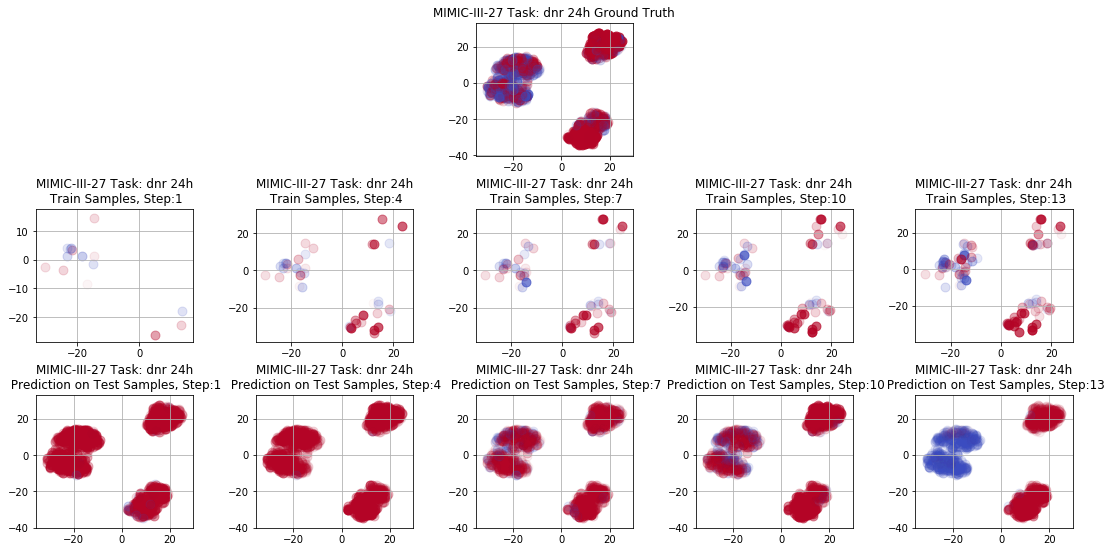

In [17]:
import copy
# 203
_perf = copy.deepcopy(perf)
plt.figure(figsize=(18,12))
figure_idx = 1
# 13可以用
with_task_idx = 10
for select_task_idx in [23]:
    for step in range(5):
        step_title = str(step*3+1)
        pred_perf = pred_traj[27*(step*3+1)]
        print(27*(step*3+1))
        mask = mask_traj[27*(step*3+1)]
        visual_mask = np.zeros(all_comb.sum(2).shape)
        visual_mask[all_comb.sum(2)!=0]=1
        new_index =[]
        for i in visual_mask:
            for j in range(len(mask)):
                if((i == mask[j]).all()):
                    new_index.append(j)
                    continue
        pred_perf=pred_perf[new_index]
        tmp = 75
        a = 0.7
        _perf = copy.deepcopy(perf)
        _pred_perf = copy.deepcopy(pred_perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        trainset_idx = []
        testset_idx = []
        for i in range(len(sel_idx)):
            if(sel_idx[i]<len(train_visual)- 13*27 + (step)*27*3 + 27 ):
                trainset_idx.append(i)
            else:
                testset_idx.append(i)
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _pred_perf = _pred_perf[sel_idx]
        _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        _pred_perf = _pred_perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        for i in range(len(_pred_perf)):
            if(_pred_perf[i]>0):
                _pred_perf[i] = 1
                _a_pred[i] = _a_pred[i]/(perf_max+0.00001)
            else:
                _pred_perf[i] = -0.5
                _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
            if(_a_pred[i]>0.99):
                _a_pred[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        embeddings = X_embedded
        label = keys
        color=_perf
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        if(step == 0):
            plt.subplot(4,5,3)
            title =  'MIMIC-III-27 Task: ' + all_task[select_task_idx] +' Ground Truth'
            plt.title(title)
            plt.grid(True)
            for i in range(len(x)):
                plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
        print(plt.gca().get_ylim())
        t_embeddings = X_embedded[trainset_idx]
        v_embeddings = X_embedded[testset_idx]
        _t_perf = _perf[trainset_idx]
        _v_perf = _pred_perf[testset_idx]
        _t_a = _a[trainset_idx]
        _v_a = _a_pred[testset_idx]
        x_t = t_embeddings[:,0]
        y_t = t_embeddings[:,1]
        plt.subplot(4,5,figure_idx+5)
        plt.title('MIMIC-III-27 Task: ' + all_task[select_task_idx]+'\n Train Samples, Step:'+step_title)
        plt.grid(True)
        for i in range(len(x_t)):
            plt.scatter(x_t[i], y_t[i], alpha=_t_a[i],color=cmap(_t_perf[i]), label=label[i],s=80)
        x_v = v_embeddings[:,0]
        y_v = v_embeddings[:,1]
        plt.subplot(4,5,figure_idx+10)
        plt.title('MIMIC-III-27 Task: ' + all_task[select_task_idx]+'\n Prediction on Test Samples, Step:'+step_title)
        plt.grid(True)
        for i in range(len(x_v)):
            plt.scatter(x_v[i], y_v[i], alpha=_v_a[i],color=cmap(_v_perf[i]), label=label[i],s=80)
        figure_idx = figure_idx + 1
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('./embed_visual/mimic27_step_traj_alpha.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

27
(-24.925889207416784, 26.489691742063908)
108
(-24.925756121536814, 26.489677529933765)
189
(-24.891147034475193, 26.486040824646903)
270
(-24.07239456723772, 26.4154841186195)
351
(-23.584025485648574, 26.37472220373376)


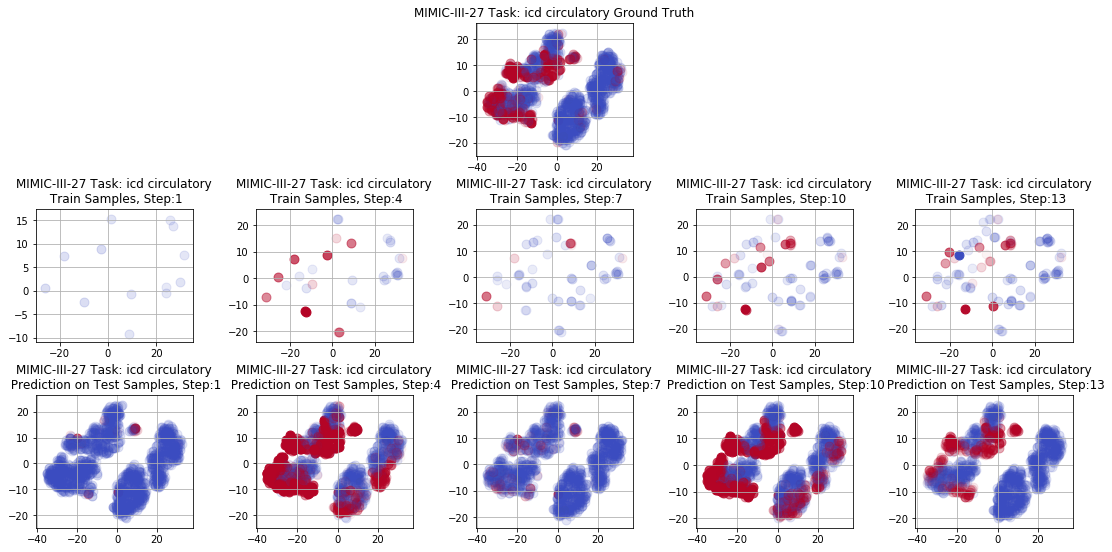

In [16]:
import copy
# 203
_perf = copy.deepcopy(perf)
plt.figure(figsize=(18,12))
figure_idx = 1
# 13可以用
with_task_idx = 10
for select_task_idx in [6]:
    for step in range(5):
        step_title = str(step*3+1)
        pred_perf = pred_traj[27*(step*3+1)]
        print(27*(step*3+1))
        mask = mask_traj[27*(step*3+1)]
        visual_mask = np.zeros(all_comb.sum(2).shape)
        visual_mask[all_comb.sum(2)!=0]=1
        new_index =[]
        for i in visual_mask:
            for j in range(len(mask)):
                if((i == mask[j]).all()):
                    new_index.append(j)
                    continue
        pred_perf=pred_perf[new_index]
        tmp = 75
        a = 0.7
        _perf = copy.deepcopy(perf)
        _pred_perf = copy.deepcopy(pred_perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        trainset_idx = []
        testset_idx = []
        for i in range(len(sel_idx)):
            if(sel_idx[i]<len(train_visual)- 13*27 + (step)*27*3 + 27 ):
                trainset_idx.append(i)
            else:
                testset_idx.append(i)
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _pred_perf = _pred_perf[sel_idx]
        _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        _pred_perf = _pred_perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        for i in range(len(_pred_perf)):
            if(_pred_perf[i]>0):
                _pred_perf[i] = 1
                _a_pred[i] = _a_pred[i]/(perf_max+0.00001)
            else:
                _pred_perf[i] = -0.5
                _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
            if(_a_pred[i]>0.99):
                _a_pred[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        embeddings = X_embedded
        label = keys
        color=_perf
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        if(step == 0):
            plt.subplot(4,5,3)
            title =  'MIMIC-III-27 Task: ' + all_task[select_task_idx] +' Ground Truth'
            plt.title(title)
            plt.grid(True)
            for i in range(len(x)):
                plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
        print(plt.gca().get_ylim())
        t_embeddings = X_embedded[trainset_idx]
        v_embeddings = X_embedded[testset_idx]
        _t_perf = _pred_perf[trainset_idx]
        _v_perf = _pred_perf[testset_idx]
        _t_a = _a_pred[trainset_idx]
        _v_a = _a_pred[testset_idx]
        x_t = t_embeddings[:,0]
        y_t = t_embeddings[:,1]
        plt.subplot(4,5,figure_idx+5)
        plt.title('MIMIC-III-27 Task: ' + all_task[select_task_idx]+'\n Train Samples, Step:'+step_title)
        plt.grid(True)
        for i in range(len(x_t)):
            plt.scatter(x_t[i], y_t[i], alpha=_t_a[i],color=cmap(_t_perf[i]), label=label[i],s=80)
        x_v = v_embeddings[:,0]
        y_v = v_embeddings[:,1]
        plt.subplot(4,5,figure_idx+10)
        plt.title('MIMIC-III-27 Task: ' + all_task[select_task_idx]+'\n Prediction on Test Samples, Step:'+step_title)
        plt.grid(True)
        for i in range(len(x_v)):
            plt.scatter(x_v[i], y_v[i], alpha=_v_a[i],color=cmap(_v_perf[i]), label=label[i],s=80)
        figure_idx = figure_idx + 1
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('./embed_visual/mimic27_step_traj_alpha.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)

27
(-31.99354096663084, 40.846382241551375)
108
(-31.992757850760405, 40.83699382946961)
189
(-31.9611185129727, 40.457684376711214)
270
(-31.959474514009017, 40.43797523840995)
351
(-31.94676354258082, 40.28598123044234)


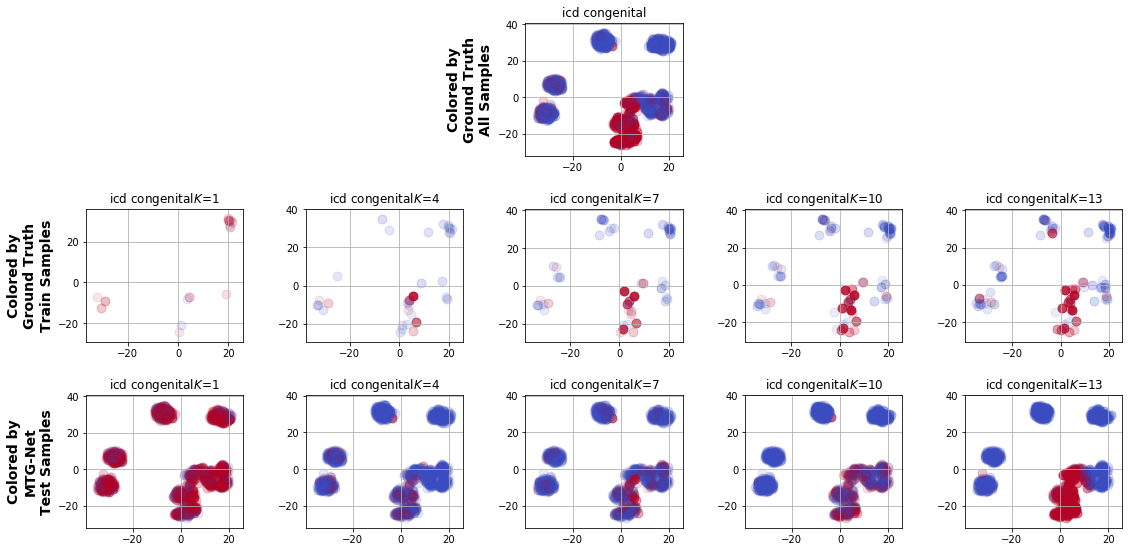

In [19]:
import copy
# 203
_perf = copy.deepcopy(perf)
plt.figure(figsize=(18,12))
# cbar_ax.tick_params(labelsize=14)
figure_idx = 1
# 13可以用
with_task_idx = 10
for select_task_idx in [13]:
    for step in range(5):
        step_title = str(step*3+1)
        pred_perf = pred_traj[27*(step*3+1)]
        print(27*(step*3+1))
        mask = mask_traj[27*(step*3+1)]
        visual_mask = np.zeros(all_comb.sum(2).shape)
        visual_mask[all_comb.sum(2)!=0]=1
        new_index =[]
        for i in visual_mask:
            for j in range(len(mask)):
                if((i == mask[j]).all()):
                    new_index.append(j)
                    continue
        pred_perf=pred_perf[new_index]
        tmp = 75
        a = 0.7
        _perf = copy.deepcopy(perf)
        _pred_perf = copy.deepcopy(pred_perf)
        sel_idx = np.where(all_comb[:,select_task_idx,:].sum(1)!=0)[0]
        trainset_idx = []
        testset_idx = []
        for i in range(len(sel_idx)):
            if(sel_idx[i]<len(train_visual)- 13*27 + (step)*27*3 + 27 ):
                trainset_idx.append(i)
            else:
                testset_idx.append(i)
        selected_comb = all_comb[sel_idx]
        _perf = _perf[sel_idx]
        _a = copy.deepcopy(_perf[:,select_task_idx])
        _pred_perf = _pred_perf[sel_idx]
        _a_pred = copy.deepcopy(_pred_perf[:,select_task_idx])
        X = selected_comb[:,select_task_idx,:]
        _perf = _perf[:,select_task_idx]
        _pred_perf = _pred_perf[:,select_task_idx]
        perf_max,perf_min = np.max(_perf), np.min(_perf)
        for i in range(len(_perf)):
            if(_perf[i]>0):
                _perf[i] = 1
                _a[i] = _a[i]/(perf_max+0.00001)
            else:
                _perf[i] = -0.5
                _a[i] = _a[i]/(perf_min-0.00001) + 0.1
            if(_a[i]>0.99):
                _a[i] = 1
        for i in range(len(_pred_perf)):
            if(_pred_perf[i]>0):
                _pred_perf[i] = 1
                _a_pred[i] = _a_pred[i]/(perf_max+0.00001) + 0.1
            else:
                _pred_perf[i] = -0.5
                _a_pred[i] = _a_pred[i]/(perf_min-0.00001) + 0.1
            if(_a_pred[i]>0.99):
                _a_pred[i] = 1
        # _perf = (_perf-np.min(_perf))/(np.max(_perf)-np.min(_perf))
        # X = all_comb[np.where(all_comb[:,with_task_idx,:].sum(1)!=0)]
        X_embedded = TSNE(n_components=2,perplexity=tmp, random_state=3).fit_transform(X)
        keys = list(range(len(X)))
        embeddings = X_embedded
        label = keys
        color=_perf
        x = embeddings[:,0]
        y = embeddings[:,1]
        cmap = matplotlib.cm.get_cmap('coolwarm')
        c = color
        # cm.get_cmap('tab20c')(np.linspace(0, 1, len(y)))
        plt.grid(True)
        if(step == 0):
            plt.subplot(4,5,3)
            title =  all_task[select_task_idx]
            plt.title(title)
            plt.grid(True)
            plt.gca().set_ylabel('Colored by\nGround Truth\nAll Samples',fontweight="bold",fontsize=14)
            for i in range(len(x)):
                plt.scatter(x[i], y[i], alpha=_a[i],color=cmap(c[i]), label=label[i],s=80)
        print(plt.gca().get_ylim())
        t_embeddings = X_embedded[trainset_idx]
        v_embeddings = X_embedded[testset_idx]
        _t_perf = _pred_perf[trainset_idx]
        _v_perf = _pred_perf[testset_idx]
        _t_a = _a_pred[trainset_idx]
        _v_a = _a_pred[testset_idx]
        x_t = t_embeddings[:,0]
        y_t = t_embeddings[:,1]
        plt.subplot(4,5,figure_idx+5)
        if(figure_idx==1):
            plt.gca().set_ylabel('Colored by\nGround Truth\nTrain Samples',fontweight="bold",fontsize=14)
        plt.title(all_task[select_task_idx]+'$K$='+step_title)
        plt.grid(True)
        for i in range(len(x_t)):
            plt.scatter(x_t[i], y_t[i], alpha=_t_a[i],color=cmap(_t_perf[i]), label=label[i],s=80)
        x_v = v_embeddings[:,0]
        y_v = v_embeddings[:,1]
        plt.subplot(4,5,figure_idx+10)        
        if(figure_idx==1):
            plt.gca().set_ylabel('Colored by\nMTG-Net\nTest Samples',fontweight="bold",fontsize=14)
        plt.title(all_task[select_task_idx]+'$K$='+step_title)
        plt.grid(True)
        for i in range(len(x_v)):
            plt.scatter(x_v[i], y_v[i], alpha=_v_a[i],color=cmap(_v_perf[i]), label=label[i],s=80)
        figure_idx = figure_idx + 1
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.savefig('./embed_visual/mimic27_step_traj_alpha_2.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    # task_embedd_c =tsne_plot_2d(keys,X_embedded,title='Task Representation, MIMIC-27 Task '+str(select_task_idx),color=_perf,show_legend=False,save_fig = False,anchor_xy = [1.05, 0.9],col=4)